# Classifying minis

This notebook uses fastai to classify old vs new minis

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
from fastai import *
from fastai.vision import *

## Looking at the data

In [3]:
ROOT_DIR = os.getcwd()
data_dir = os.path.join(ROOT_DIR, "downloads")
classes = ['new_mini','old_mini']

In [4]:
print("Data directory is {}".format(data_dir))

Data directory is /Users/lindsayedwards/Tresors/DeepLearning/fastai/fastai-coursework/lesson-2/updated-mini-classifier/downloads


In [5]:
np.random.seed(123)
data = ImageDataBunch.from_folder(
    data_dir, 
    train=".", 
    valid=".",
    valid_pct=0.2,
    ds_tfms=get_transforms(),
    size=224,
    num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['new_mini', 'old_mini']

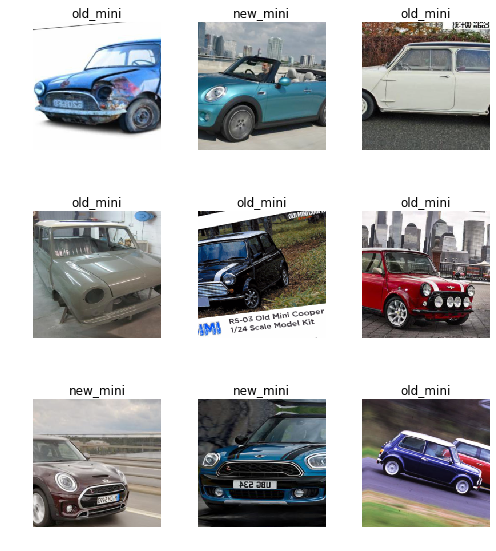

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['new_mini', 'old_mini'], 2, 232, 58)

## Train the model
First, ResNet34

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

In [11]:
learn.save('stage-1')

The data were clearly contaminated, so let's clean them up

In [30]:
from fastai.widgets import *

ModuleNotFoundError: No module named 'fastai.widgets'

In [15]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [18]:
ImageCleaner(ds, idxs, Path(data_dir))

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [21]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [22]:
ImageCleaner(ds, idxs, Path(data_dir), duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Now we've cleaned the data up, let's train again

In [38]:
ImageDataBunch.from_csv?

In [34]:
data_dir

'/Users/lindsayedwards/Tresors/DeepLearning/fastai/fastai-coursework/lesson-2/updated-mini-classifier/downloads'

In [43]:
doc(ImageDataBunch.from_csv)

In [4]:
np.random.seed(123)
data = ImageDataBunch.from_csv(
    "./downloads/", 
    folder=".", 
    valid_pct=0.2, 
    csv_labels='cleaned.csv',
    ds_tfms=get_transforms(), 
    size=224, 
    num_workers=4).normalize(imagenet_stats)

In [5]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Total time: 00:16
epoch  train_loss  valid_loss  error_rate
1      0.943941    0.565142    0.341463    (00:06)
2      0.697430    0.310136    0.121951    (00:03)
3      0.538034    0.317776    0.097561    (00:03)
4      0.439855    0.347519    0.097561    (00:03)



In [6]:
learn.save('stage-1-clean-data')

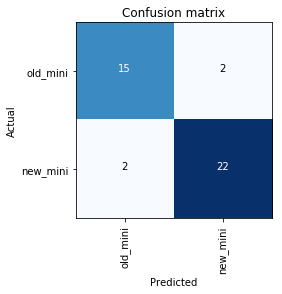

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Moving to Stage 2...

In [8]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


In [9]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,3e-4))

Total time: 00:15
epoch  train_loss  valid_loss  error_rate
1      0.193125    0.419419    0.097561    (00:03)
2      0.154310    0.476177    0.073171    (00:03)
3      0.120222    0.379258    0.073171    (00:03)
4      0.100529    0.381094    0.073171    (00:03)



In [10]:
learn.save('stage-2-clean-data')

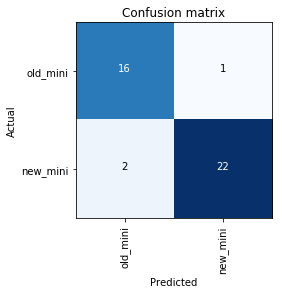

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Looking pretty good. Let's try ResNet50

In [25]:
# reload the data
np.random.seed(123)
data = ImageDataBunch.from_csv(
    "./downloads/", 
    folder=".", 
    valid_pct=0.2, 
    csv_labels='cleaned.csv',
    ds_tfms=get_transforms(), 
    size=224, 
    num_workers=4).normalize(imagenet_stats)

In [13]:
# download and run RN50
learn = create_cnn(data, models.resnet50, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

Total time: 00:31
epoch  train_loss  valid_loss  error_rate
1      0.844332    0.519417    0.243902    (00:16)
2      0.529249    0.671998    0.219512    (00:04)
3      0.415578    0.539186    0.097561    (00:04)
4      0.338512    0.475634    0.097561    (00:04)



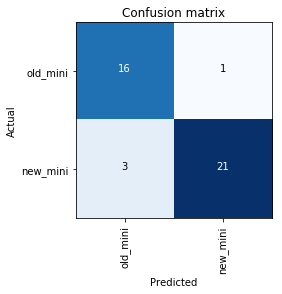

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [26]:
learn.unfreeze()

In [ ]:
learn.lr_find()

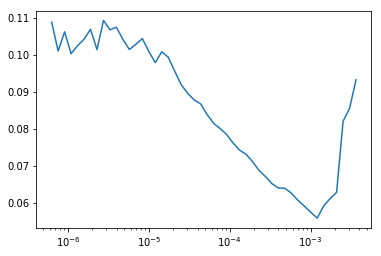

In [18]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-3))

Total time: 00:23
epoch  train_loss  valid_loss  error_rate
1      0.134394    0.284279    0.097561    (00:06)
2      0.098272    0.473620    0.073171    (00:05)
3      0.071879    0.290129    0.073171    (00:05)
4      0.061561    0.273408    0.073171    (00:05)



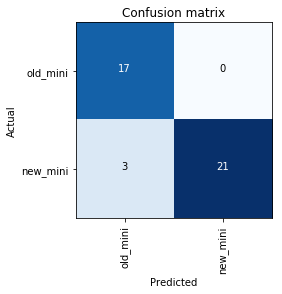

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [29]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

NameError: name 'DatasetFormatter' is not defined

Performance is no better than the simple model